# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # pause for 1 second using time.sleep() - avoids the Operweather API key from being disabled
        time.sleep(1) 
       
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tolanaro
Processing Record 2 of Set 1 | naze
Processing Record 3 of Set 1 | ayr
Processing Record 4 of Set 1 | al ghayzah
Processing Record 5 of Set 1 | utrik
Processing Record 6 of Set 1 | salym
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | vadso
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | coquimbo
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | goniri
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | gamay
Processing Record 18 of Set 1 | ramnagar
Processing Record 19 of Set 1 | zbarazh
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | aasiaat
Processing Record 22 of Set 1 | rumphi
Processing Record 23 of Set 1 | olonkin

Processing Record 25 of Set 8 | torrington
Processing Record 26 of Set 8 | krutikha
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | numan
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | lerik
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | katyuzhanka
P

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tolanaro,-25.0319,46.9987,74.16,81,0,10.58,MG,1732331318
1,naze,28.3667,129.4833,66.81,56,3,12.64,JP,1732331319
2,ayr,55.4627,-4.6339,35.58,94,100,13.80,GB,1732331285
3,al ghayzah,16.2079,52.1760,74.62,76,83,5.01,YE,1732331321
4,utrik,11.2278,169.8474,82.96,79,36,20.15,MH,1732331323


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,74.16,81,0,10.58,MG,1732331318
1,naze,28.3667,129.4833,66.81,56,3,12.64,JP,1732331319
2,ayr,55.4627,-4.6339,35.58,94,100,13.80,GB,1732331285
3,al ghayzah,16.2079,52.1760,74.62,76,83,5.01,YE,1732331321
4,utrik,11.2278,169.8474,82.96,79,36,20.15,MH,1732331323


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

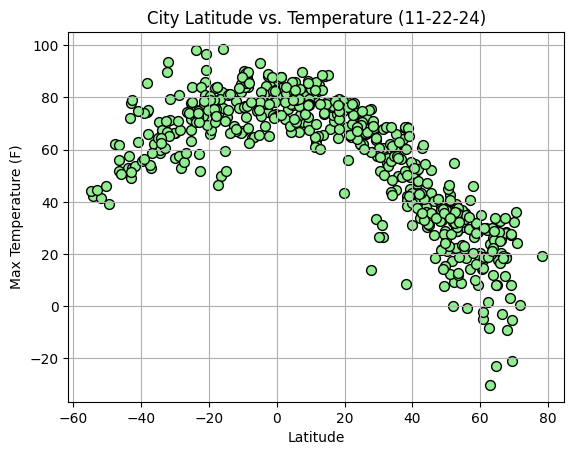

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color= "lightgreen",
    edgecolor= "black",
    linewidths= 1,
    marker="o",
    label= "Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

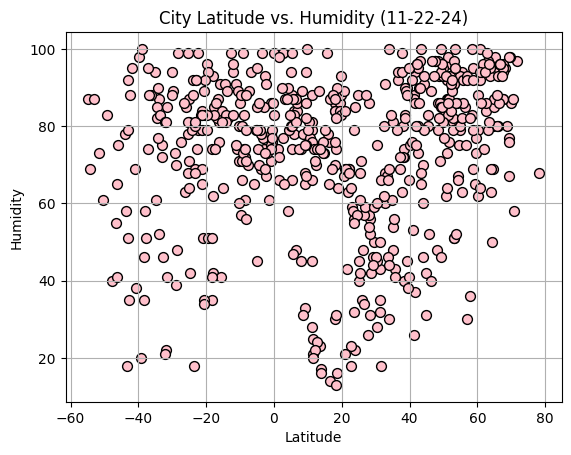

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color= "pink",
    edgecolor= "black",
    linewidths= 1,
    marker="o",
    label= "Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

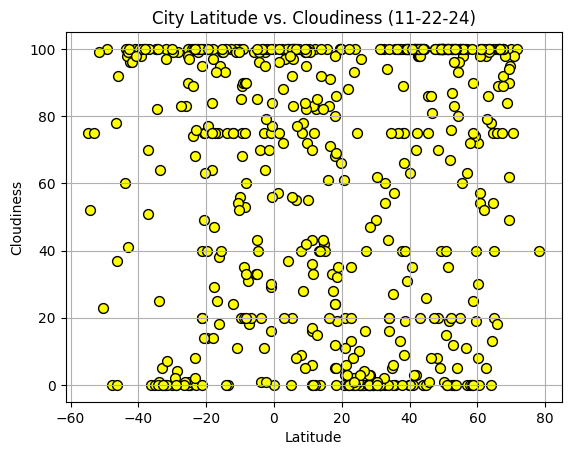

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color= "yellow",
    edgecolor= "black",
    linewidths= 1,
    marker="o",
    label= "Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%m-%d-%y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

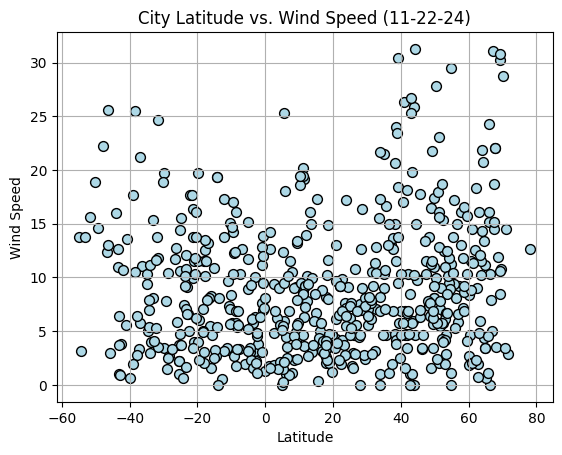

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color= "lightblue",
    edgecolor= "black",
    linewidths= 1,
    marker="o",
    label= "Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%m-%d-%y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):

    # compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept,2))

    # plot
    plt.scatter(x_values, y_values, color=color, edgecolor= "black", s=50)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,naze,28.3667,129.4833,66.81,56,3,12.64,JP,1732331319
2,ayr,55.4627,-4.6339,35.58,94,100,13.80,GB,1732331285
3,al ghayzah,16.2079,52.1760,74.62,76,83,5.01,YE,1732331321
4,utrik,11.2278,169.8474,82.96,79,36,20.15,MH,1732331323
5,salym,60.0625,71.4789,20.35,88,30,8.39,RU,1732331324


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,74.16,81,0,10.58,MG,1732331318
6,grytviken,-54.2811,-36.5092,42.33,69,52,3.18,GS,1732331325
10,coquimbo,-29.9533,-71.3436,56.93,94,0,3.44,CL,1732331155
11,edinburgh of the seven seas,-37.0676,-12.3116,52.90,74,70,21.18,SH,1732331331
13,carnarvon,-24.8667,113.6333,84.00,42,0,15.52,AU,1732331333


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7974669101493735


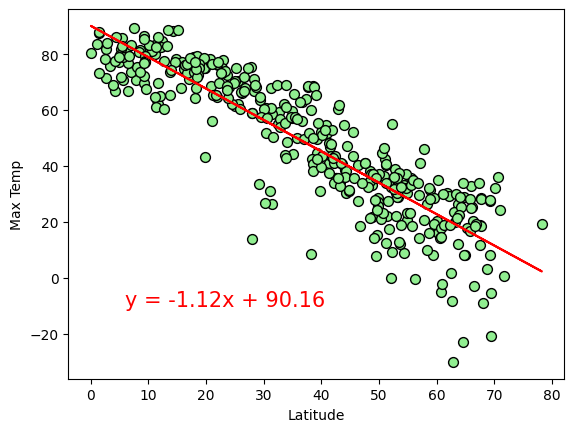

In [18]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]
plot_linear_regression(x_value, y_value, "Max Temp",(6,-10), "lightgreen")

The r-value is: 0.3448371212980883


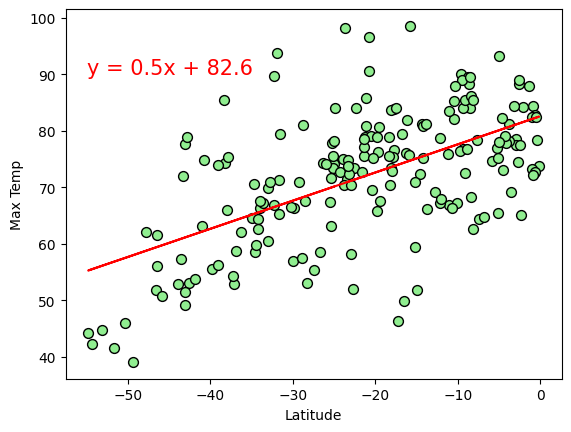

In [19]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]
plot_linear_regression(x_value, y_value, "Max Temp",(-55,90), "lightgreen")

**Discussion about the linear relationship:** 
************The r-value (correlation coefficient) of 0.797 indicates a strong positive linear relationship between the latitude (x-value) and the maximum temperature (y-value) in the Northern Hemisphere.
************The r-value of 0.345 for the Southern Hemisphere indicates a weak positive linear relationship between latitude (x-value) and maximum temperature (y-value).(seasonal variations)

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09495394448060109


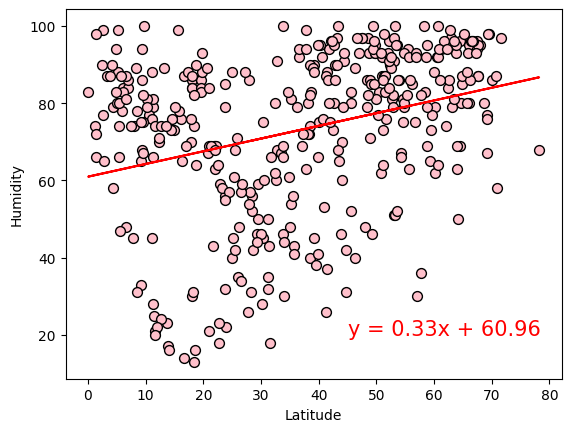

In [22]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]
plot_linear_regression(x_value, y_value, "Humidity",(45,20), "pink")

The r-value is: 0.046088430562729925


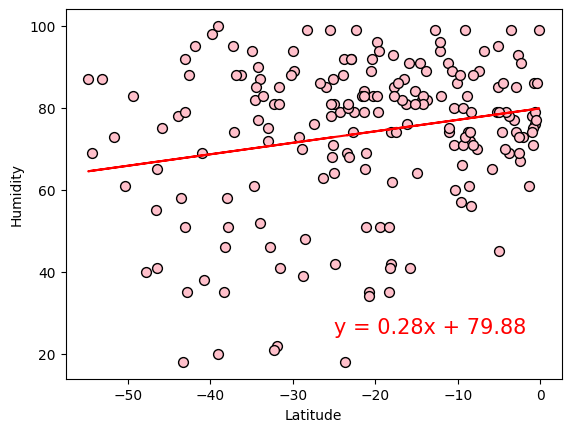

In [25]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
plot_linear_regression(x_value, y_value, "Humidity",(-25,25), "pink")

**Discussion about the linear relationship:**
************The r-value of 0.095 for the relationship between latitude (x-value) and humidity (y-value) in the Northern Hemisphere indicates an extremely weak positive correlation. An r-value close to 0 suggests that there is little to no linear relationship between these two variables.
************The r-value of 0.046 for the relationship between latitude (x-value) and humidity (y-value) in the Southern Hemisphere indicates an extremely weak positive correlation, virtually close to zero. This suggests that there is almost no linear relationship between latitude and humidity in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.029927809207192974


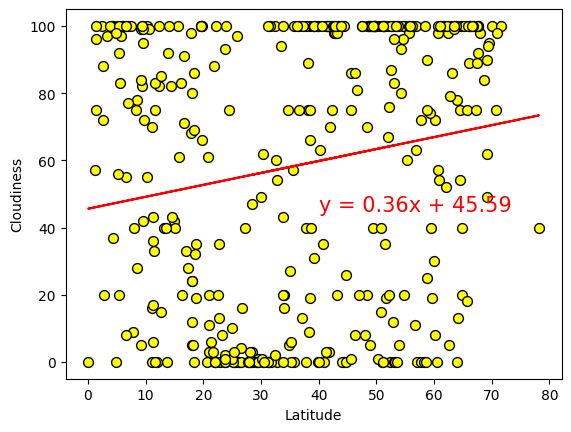

In [27]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_value, y_value, "Cloudiness",(40,45), "yellow")

The r-value is: 1.2566055298329803e-06


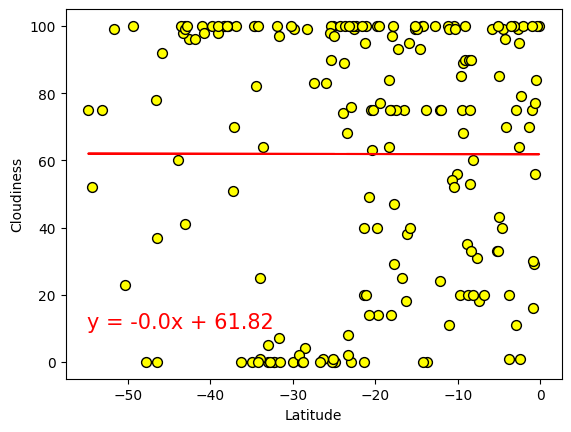

In [29]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_value, y_value, "Cloudiness",(-55,10), "yellow")

**Discussion about the linear relationship:**
***********The r-value of 0.030 for the relationship between latitude (x-value) and cloudiness (y-value) in the Northern Hemisphere indicates an extremely weak positive correlation. This value is very close to 0, suggesting that there is virtually no linear relationship between latitude and cloudiness.
***********The r-value of (1.26*10^(-6)) for the relationship between latitude (x-value) and cloudiness (y-value) in the Southern Hemisphere is extremely close to zero. This suggests that there is virtually no linear relationship between these two variables

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.055969611423294194


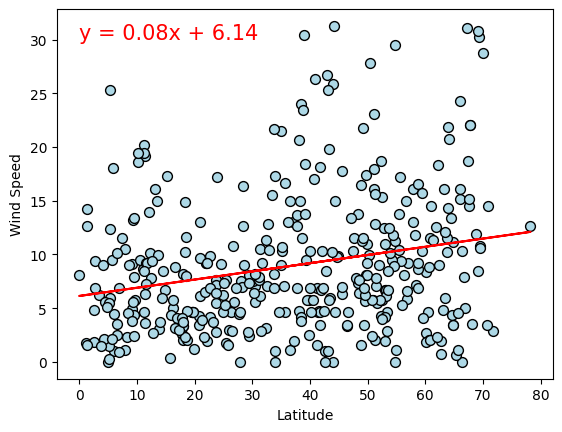

In [31]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_value, y_value, "Wind Speed",(0,30), "lightblue")

The r-value is: 0.04518274136893113


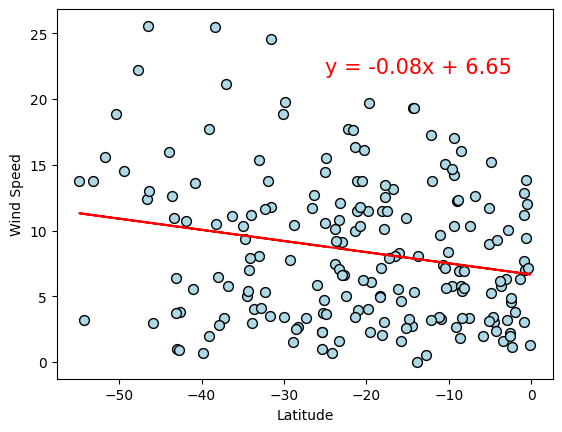

In [33]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_value, y_value, "Wind Speed",(-25,22), "lightblue")

**Discussion about the linear relationship:** 
*********The r-value of 0.056 for the relationship between latitude (x-value) and wind speed (y-value) in the Northern Hemisphere indicates an extremely weak positive correlation. This value is very close to 0, meaning that there is essentially no linear relationship between latitude and wind speed.
*********The r-value of 0.045 for the relationship between latitude (x-value) and wind speed (y-value) in the Southern Hemisphere indicates an extremely weak positive correlation. This value is very close to 0, meaning that latitude has almost no linear relationship with wind speed in this region.